### Hands-On Telco Customer Churn Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [6]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

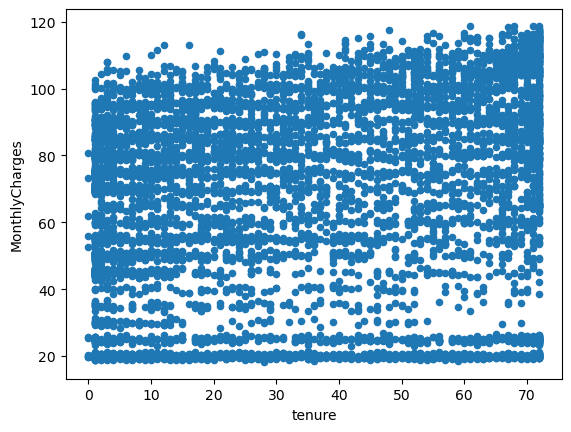

In [8]:
df.plot(x='tenure', y='MonthlyCharges', kind='scatter')

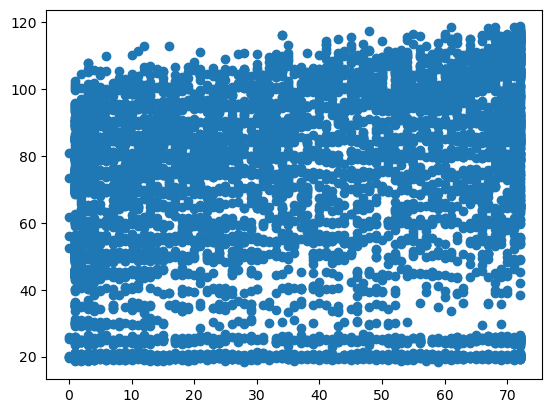

In [10]:
plt.scatter(x='tenure', y='MonthlyCharges', data=df)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

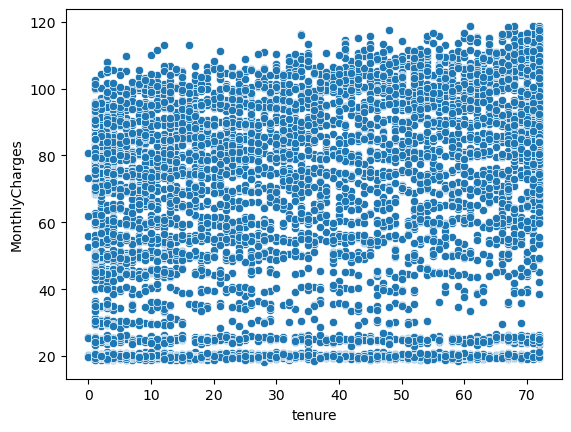

In [11]:
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df)

<AxesSubplot:ylabel='Frequency'>

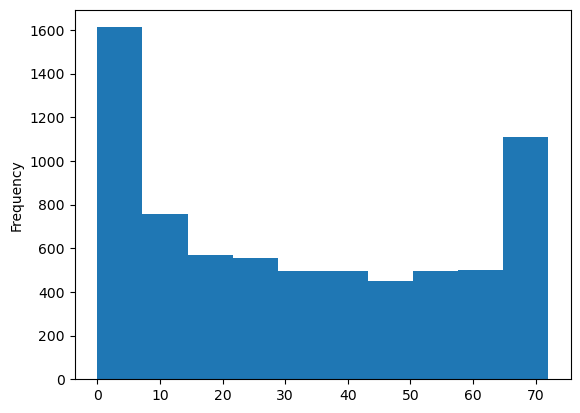

In [12]:
df['tenure'].plot(kind='hist')

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

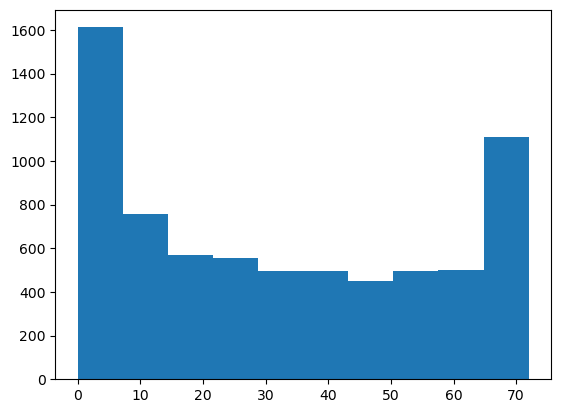

In [14]:
plt.hist(x='tenure', data=df)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

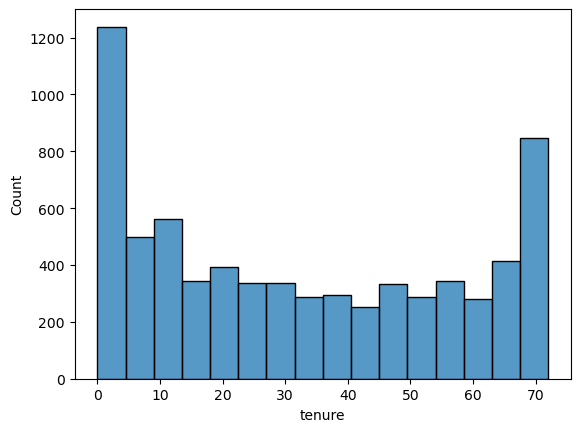

In [15]:
sns.histplot(x='tenure', data= df)

<AxesSubplot:xlabel='tenure'>

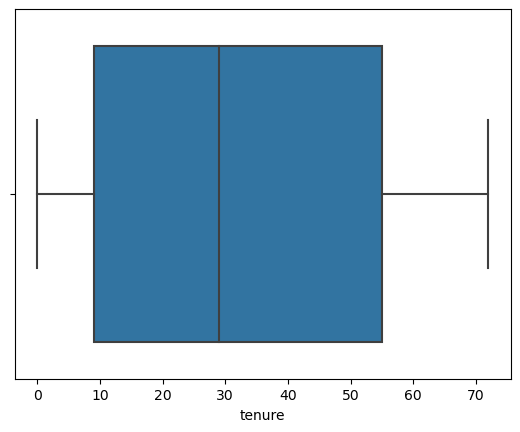

In [16]:
sns.boxplot(x='tenure', data=df)

<AxesSubplot:xlabel='tenure', ylabel='PaymentMethod'>

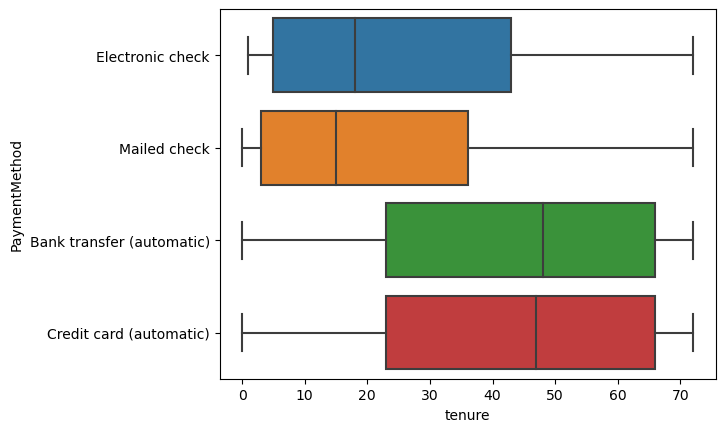

In [19]:
sns.boxplot(x='tenure', y='PaymentMethod', data=df)

#### create group by berdasarkan payment method nya

In [20]:
dfg = df.groupby('PaymentMethod').sum().reset_index()

In [21]:
dfg.head()

,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges
0,Bank transfer (automatic),233,67406,103745.45
1,Credit card (automatic),221,65856,101231.85
2,Electronic check,594,59538,180345.00
3,Mailed check,94,35190,70794.30


<AxesSubplot:xlabel='PaymentMethod'>

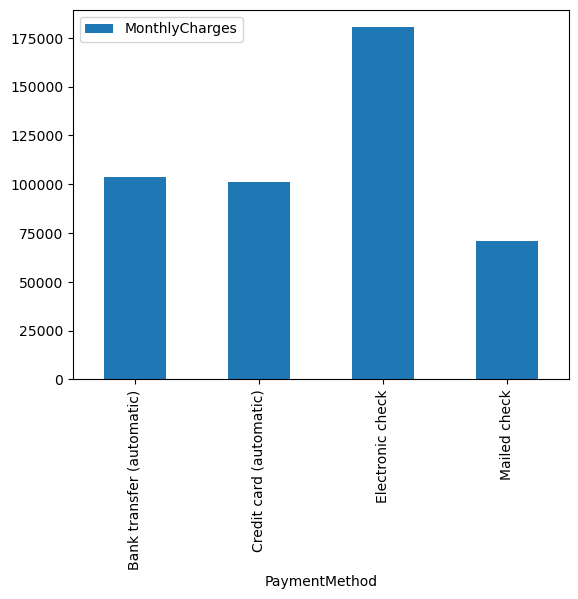

In [23]:
dfg.plot(x='PaymentMethod',y='MonthlyCharges', kind='bar')

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

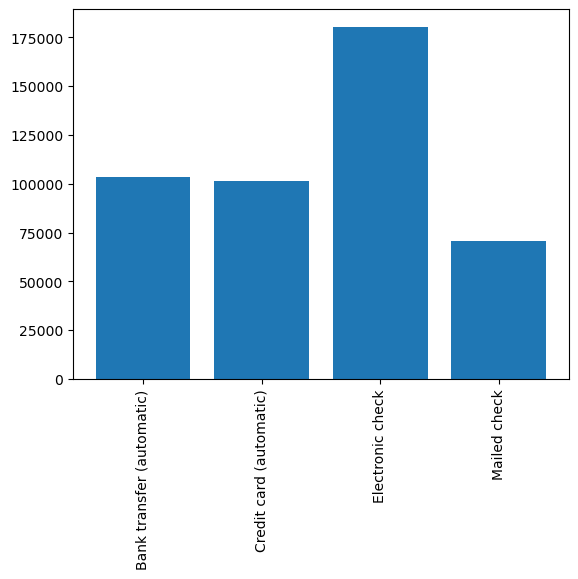

In [26]:
plt.bar(x='PaymentMethod',height='MonthlyCharges', data=dfg)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

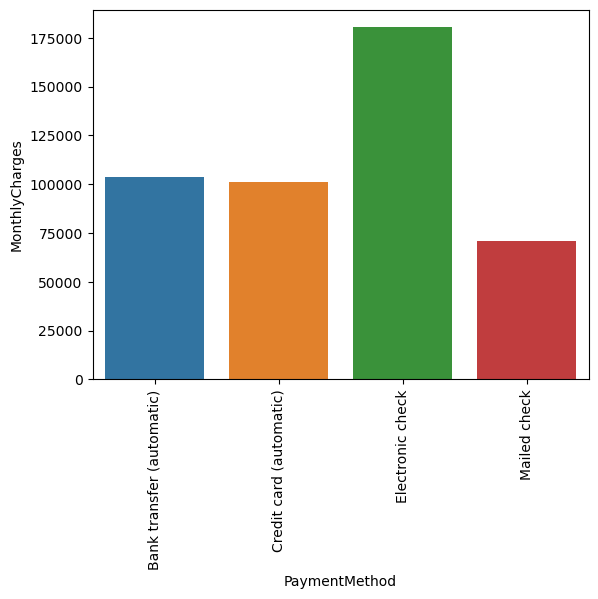

In [31]:
sns.barplot(x='PaymentMethod',y='MonthlyCharges', data=dfg)
plt.xticks(rotation=90)

### pengen liat dari churn nya
**3 variabel**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='PaymentMethod'>

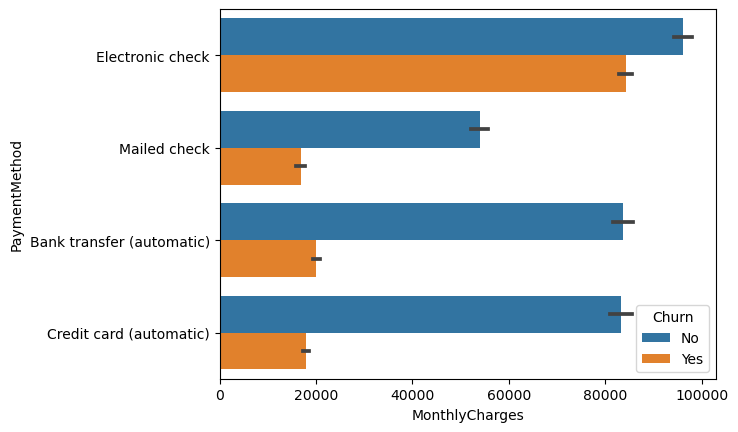

In [34]:
sns.barplot(x ='MonthlyCharges',y='PaymentMethod',data=df, estimator=sum, hue='Churn')

In [37]:
dfgc = df.groupby(['PaymentMethod','Churn'])['MonthlyCharges'].sum().reset_index()

In [38]:
dfgc.head()

,PaymentMethod,Churn,MonthlyCharges
0,Bank transfer (automatic),No,83653.55
1,Bank transfer (automatic),Yes,20091.90
2,Credit card (automatic),No,83285.25
3,Credit card (automatic),Yes,17946.60
4,Electronic check,No,96056.25


In [40]:
dtp = dfgc.pivot_table(index='PaymentMethod', columns='Churn', values='MonthlyCharges')

In [42]:
dtp.head()

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83653.55,20091.90
Credit card (automatic),83285.25,17946.60
Electronic check,96056.25,84288.75
Mailed check,53990.70,16803.60


<AxesSubplot:xlabel='PaymentMethod'>

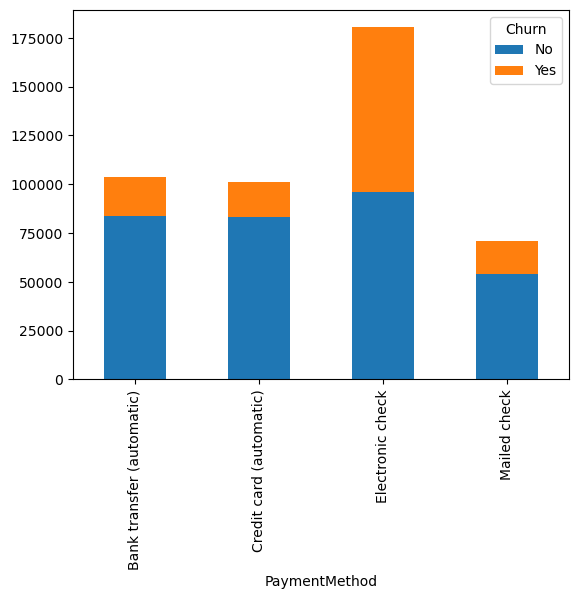

In [43]:
dtp.plot(kind='bar',stacked = True)